In [1]:
from Functions_23_Buda import *

# select the first 2 letters of my surname
letters = ['B', 'U']

In [2]:
X_train, y_train, X_test, y_test = SVM_data_loading(*letters)
cvres = GridSearchCV(X_train, y_train, get_model_CVXOPT, {'C' : [1e-2,1e-1,1,10], 'gamma' : [1e-2,1e-1,1,10]}, k = 10, kernel_type = 'gaussian')

  0%|          | 0/16 [00:00<?, ?it/s]

The best gaussian kSVM has C = 0.1 and γ = 0.1 with performances:
Training accuracy (on the complete training dataset)= 0.9960443037974683
Test accuracy = 0.9936507936507937
Time necessary for the optimization = 2.186788320541382 seconds
Number of optimization iterations = 11
Final value of the objective function of the dual = 21.232919588399454


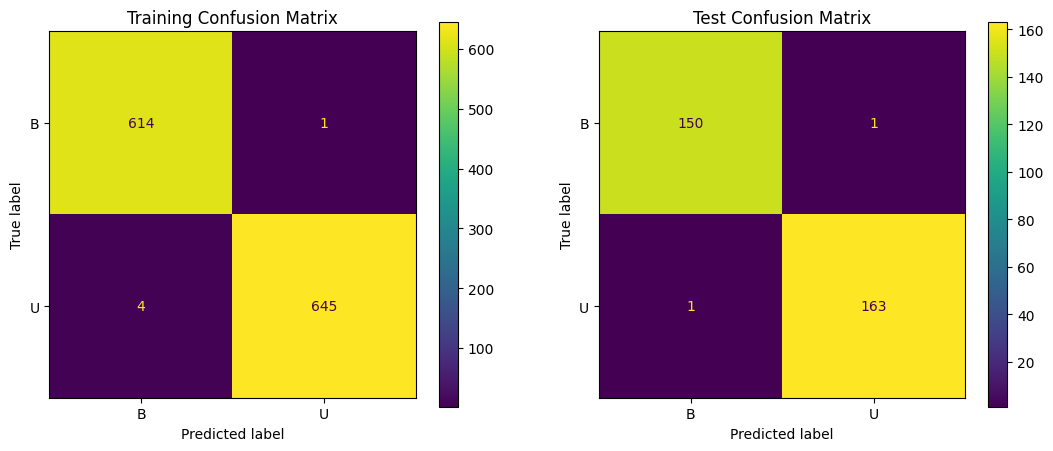

In [6]:
print(f"The best gaussian kSVM has C = {cvres['best_params']['C']} and γ = {cvres['best_params']['gamma']} with performances:")
# print(f"Average crossvalidation accuracy = {cvres['best_val_acc']}")
print(f"Training accuracy (on the complete training dataset)= {cvres['best_model'].evaluate(X_train, y_train)}")
print(f"Test accuracy = {cvres['best_model'].evaluate(X_test, y_test)}")
print(f"Time necessary for the optimization = {cvres['best_model'].exec_time} seconds")
print(f"Number of optimization iterations = {cvres['best_model'].n_iter}")
print(f"Final value of the objective function of the dual = {cvres['best_model'].final_dual_obj}")
plot_confusion_matrices(cvres['best_model'], X_train, y_train, X_test, y_test, letters)